# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [34]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

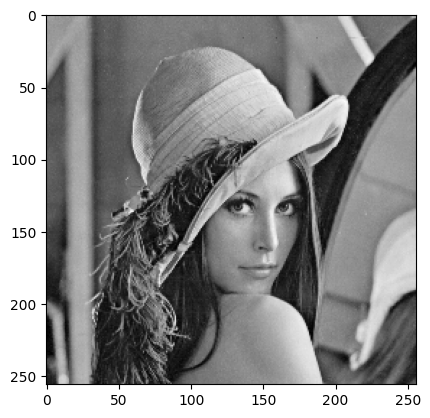

In [35]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'gray')

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [53]:
def prewitt_h(img):
    # write your code here
    result = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    h_Filter = numpy.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0]- n and n <= p[1] < img.shape[1]- n:
            neighborhood_sum = 0
            for q in numpy.ndindex(3, 3):
                intensity = img[p[0] + q[0] - n, p[1] + q[1] - n]
                neighborhood_sum += (h_Filter[q[0], q[1]] * intensity)
            result[p[0],p[1]] = neighborhood_sum / 6
    return result
    


In [58]:
def prewitt_v(img):
    # write your code here
    result = numpy.zeros(img.shape)
    n = (3 - 1) // 2
    v_Filter = numpy.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0]- n and n <= p[1] < img.shape[1]- n:
            neighborhood_sum = 0
            for q in numpy.ndindex(3, 3):
                intensity = img[p[0] + q[0] - n, p[1] + q[1] - n]
                neighborhood_sum += (v_Filter[q[0], q[1]] * intensity)
            result[p[0],p[1]] = neighborhood_sum / 6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

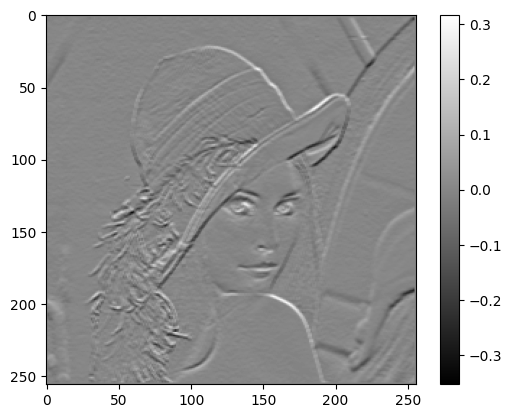

In [59]:
img_v2 = prewitt_v(img)
plt.imshow(img_v2, 'gray')
plt.colorbar()

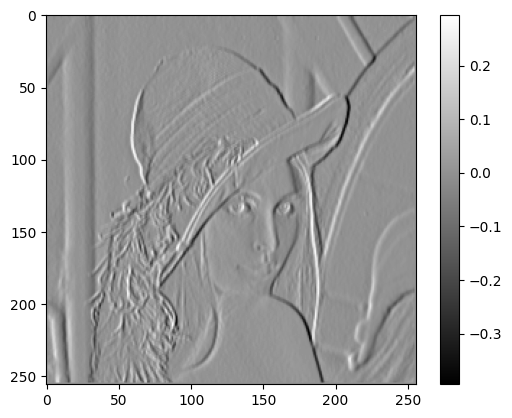

In [60]:
img_h2 = prewitt_h(img)
plt.imshow(img_h2, 'gray')
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

In [61]:
import skimage.io
img_lena_h = skimage.io.imread('data/lena_prewitt_h.tiff')
img_lena_v = skimage.io.imread('data/lena_prewitt_v.tiff')

assert numpy.allclose(img_h2, img_lena_h, atol=1/255)
assert numpy.allclose(img_v2, img_lena_v, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`: